In [5]:
library('ggplot2')

In [2]:
realdata <- read.csv(file.path('..', 'zmeta_rocs', 'results', 'realdata_TPR.csv'), header=T, sep=",")


In [3]:
head(realdata)

Method,p,TPR
Fisher,0.000000e+00,0.0000000
Fisher,1.000000e-08,0.8448477
Fisher,1.204504e-08,0.8460678
Fisher,1.450829e-08,0.8469320
Fisher,1.747528e-08,0.8486605
Fisher,2.104904e-08,0.8501856


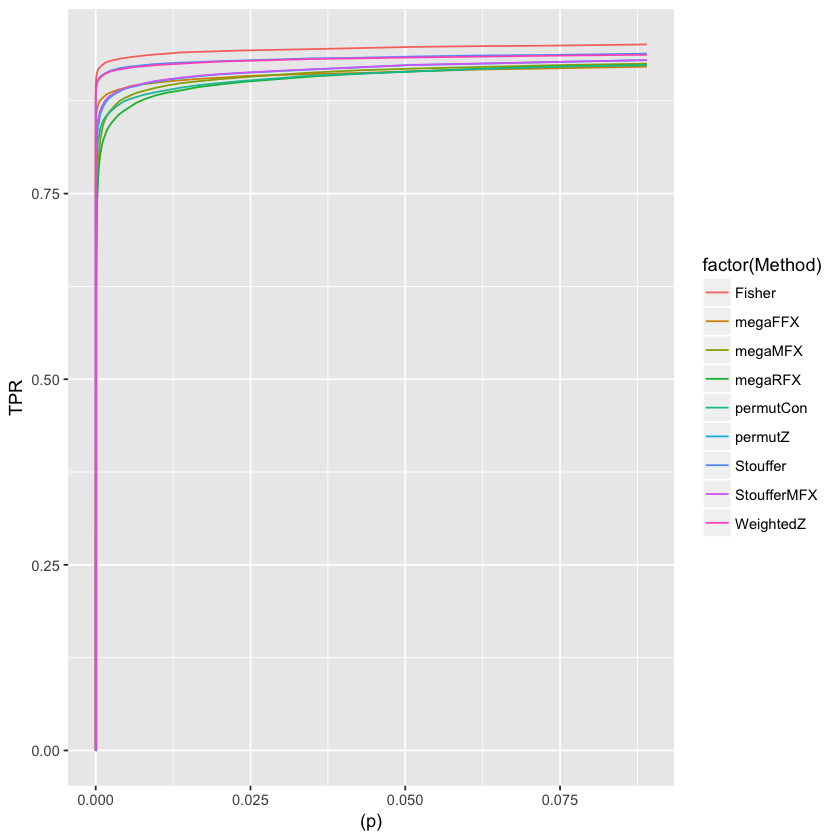

In [25]:
p <- ggplot(data=subset(realdata, p<0.1),aes(x=(p), y=TPR, group=Method, colour=factor(Method))) + 
geom_line() 
# facet_grid(.~Method) 

# aes(x=-log10(expectedP), y=-log10(P), group=allgroups, colour=factor(Within))

# + geom_ribbon(
#                 aes_ribbon, 
#                 fill="grey", alpha=.8, colour=NA) + 
#             facet_grid(Method~.) + 
#             theme(strip.text.x = element_text(size = 10)) +
#             ylab(ylabel) + xlab(xlabel) + 
#             geom_line(aes_line, colour="black") + theme(legend.position="bottom")
#     #         geom_point(size=0.5) + 

print(p)

In [135]:
simufpr <- read.csv(file.path('data', 'allsimudat_test1_k025_n20_nominal.csv'))
head(simufpr)

methods,glm,nStudies,nSubjects,Between,Within,nSubjectsSame,withinVariation,unitMism,soft2,⋯,rankP,expectedP,lnp,equivz,allgroups,expectedz,p_upper,z_upper,p_lower,z_lower
fishers,1,25,20,1,20,1,16,nominal,0,⋯,1,9.746589e-07,-49.52660,9.626282,1 20 25 20 1026000 16 0 1 nominal,4.758609,2.467623e-08,5.453628,3.595393e-06,4.487962
fishers,1,25,20,1,20,1,16,nominal,0,⋯,2,1.949318e-06,-48.10786,9.479343,1 20 25 20 1026000 16 0 1 nominal,4.616714,2.360715e-07,5.037301,5.430440e-06,4.399284
fishers,1,25,20,1,20,1,16,nominal,0,⋯,3,2.923977e-06,-46.15251,9.273095,1 20 25 20 1026000 16 0 1 nominal,4.531813,6.029947e-07,4.854651,7.041588e-06,4.342560
fishers,1,25,20,1,20,1,16,nominal,0,⋯,4,3.898635e-06,-45.07518,9.157519,1 20 25 20 1026000 16 0 1 nominal,4.470676,1.062248e-06,4.741206,8.545076e-06,4.299866
fishers,1,25,20,1,20,1,16,nominal,0,⋯,5,4.873294e-06,-43.65503,9.002951,1 20 25 20 1026000 16 0 1 nominal,4.422720,1.582347e-06,4.659831,9.982025e-06,4.265292
fishers,1,25,20,1,20,1,16,nominal,0,⋯,6,5.847953e-06,-43.44453,8.979819,1 20 25 20 1026000 16 0 1 nominal,4.383181,2.146099e-06,4.596707,1.137261e-05,4.236084


In [137]:
simufpr_homo <- subset(simufpr, withinVariation==1 & Between==1 & Within==20)

[1] 1 20 25 20 1026000  1 0 1 nominal
18 Levels: 0 10 25 20 1026000  1 0 1 nominal ...

In [102]:
simufpr_out16 <- subset(simufpr, withinVariation==16 & Between==1) 
names(simufpr_out16)

[1] "methods"         "glm"             "nStudies"        "nSubjects"      
 [5] "Between"         "Within"          "nSubjectsSame"   "withinVariation"
 [9] "unitMism"        "soft2"           "soft2Factor"     "nSimu"          
[13] "minuslog10P"     "P"               "rankP"           "expectedP"      
[17] "lnp"             "equivz"          "allgroups"       "expectedz"      
[21] "p_upper"         "z_upper"         "p_lower"         "z_lower"

In [142]:
# simufpr_out16$Method <- simufpr_out16$methods

levels(simufpr_out16$methods)[levels(simufpr_out16$methods)=="fishers"] <- "Fisher"
levels(simufpr_out16$methods)[levels(simufpr_out16$methods)=="megaFFX_FSL"] <- "megaFFX"
levels(simufpr_out16$methods)[levels(simufpr_out16$methods)=="stouffers"] <- "Stouffer"
levels(simufpr_out16$methods)[levels(simufpr_out16$methods)=="stouffersMFX"] <- "StoufferMFX"
levels(simufpr_out16$methods)[levels(simufpr_out16$methods)=="weightedZ"] <- "WeightedZ"

levels(simufpr_homo$methods)[levels(simufpr_homo$methods)=="fishers"] <- "Fisher"
levels(simufpr_homo$methods)[levels(simufpr_homo$methods)=="megaFFX_FSL"] <- "megaFFX"
levels(simufpr_homo$methods)[levels(simufpr_homo$methods)=="stouffers"] <- "Stouffer"
levels(simufpr_homo$methods)[levels(simufpr_homo$methods)=="stouffersMFX"] <- "StoufferMFX"
levels(simufpr_homo$methods)[levels(simufpr_homo$methods)=="weightedZ"] <- "WeightedZ"

print(levels(simufpr_out16$methods))
print('--')
print(levels(realdata$Method))



[1] "Fisher"      "megaFFX"     "megaMFX"     "megaRFX"     "permutCon"  
[6] "permutZ"     "Stouffer"    "StoufferMFX" "WeightedZ"  
[1] "--"
[1] "Fisher"      "megaFFX"     "megaMFX"     "megaRFX"     "permutCon"  
[6] "permutZ"     "Stouffer"    "StoufferMFX" "WeightedZ"  


In [143]:
methods <- levels(realdata$Method)
length(methods)

realdata$expectedP_out16 <- realdata$p*NaN
realdata$expectedP_homo <- realdata$p*NaN

for (i in 1:length(methods)){
    print(methods[i])
    th_p = realdata[realdata$Method==methods[i],]$p
    for (j in 1:length(th_p)){
#         print('---')
        
        stored_p_out16 = simufpr_out16[simufpr_out16$methods==methods[i],]$P
        expected_p_out16 = simufpr_out16[simufpr_out16$methods==methods[i],]$expectedP

        stored_p_homo = simufpr_homo[simufpr_homo$methods==methods[i],]$P
        expected_p_homo = simufpr_homo[simufpr_homo$methods==methods[i],]$expectedP
        
        
#         print(th_p[j])
        pos_out16 = which.min(abs(stored_p_out16-th_p[j]))
        pos_homo = which.min(abs(stored_p_homo-th_p[j]))
#         print(pos)
#         print(stored_p[pos])
#         print(realdata[realdata$Method==methods[i],]$expectedP[j])
#         print(pos)
#         print(stored_p)
#         print(th_p[j])

        realdata[realdata$Method==methods[i],]$expectedP_out16[j] <- expected_p_out16[pos_out16]
        
        
        realdata[realdata$Method==methods[i],]$expectedP_homo[j] <- expected_p_homo[pos_homo]
#         print(aa)
        
#         print(simufpr_out16[simufpr_out16$methods==methods[i] & simufpr_out16$P==th_p[j],]$expectedP)
    }

}

head(realdata)

[1] 9

[1] "Fisher"
[1] "megaFFX"
[1] "megaMFX"
[1] "megaRFX"
[1] "permutCon"
[1] "permutZ"
[1] "Stouffer"
[1] "StoufferMFX"
[1] "WeightedZ"


Method,p,TPR,expectedP,expectedP_out16,expectedP_homo
Fisher,0.000000e+00,0.0000000,9.746589e-07,9.746589e-07,9.746589e-07
Fisher,1.000000e-08,0.8448477,1.788109e-02,1.788109e-02,2.592593e-04
Fisher,1.204504e-08,0.8460678,1.851267e-02,1.851267e-02,2.884990e-04
Fisher,1.450829e-08,0.8469320,1.916569e-02,1.916569e-02,3.089669e-04
Fisher,1.747528e-08,0.8486605,2.054288e-02,2.054288e-02,3.313840e-04
Fisher,2.104904e-08,0.8501856,2.126803e-02,2.126803e-02,3.674464e-04


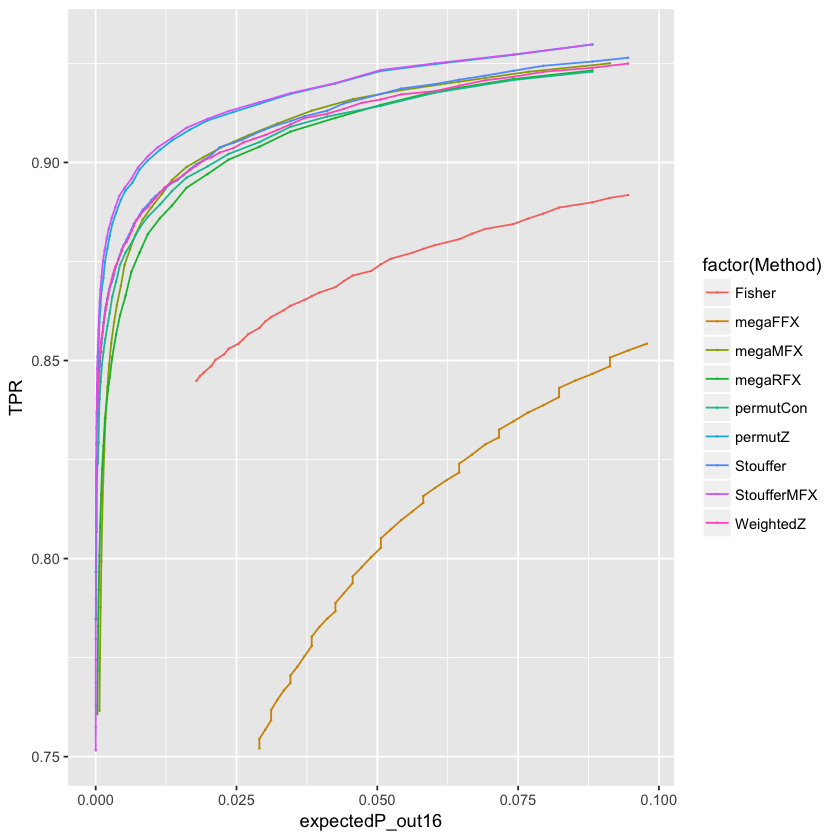

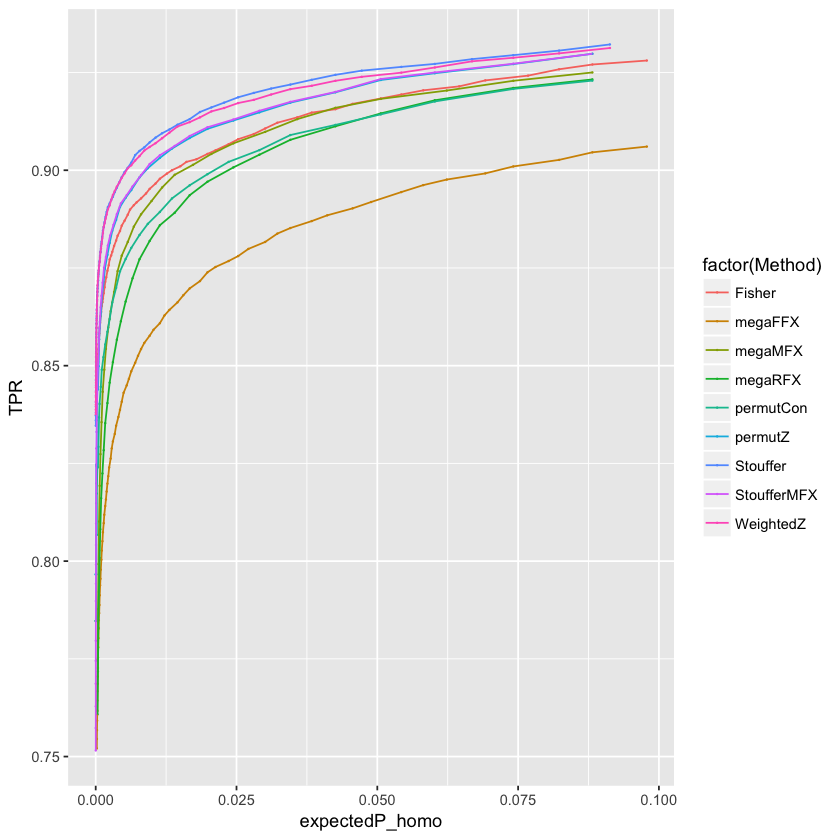

In [144]:
# p <- ggplot(data=subset(realdata, p<=0.1 & TPR>0.75),aes(x=p, y=TPR, group=Method, colour=factor(Method))) + 
# geom_point(size=0.02) + geom_line()
# print(p)

p <- ggplot(data=subset(realdata, expectedP_out16<=0.1 & TPR>0.75),aes(x=expectedP_out16, y=TPR, group=Method, colour=factor(Method))) + 
geom_point(size=0.02) + geom_line()
print(p)

p <- ggplot(data=subset(realdata, expectedP_homo<=0.1 & TPR>0.75),aes(x=expectedP_homo, y=TPR, group=Method, colour=factor(Method))) + 
geom_point(size=0.02) + geom_line()
print(p)